# Project 4: Prediciting Mobile Phone Price Range
Nati Marcus, Fnu Parshant, Shengjie Lin, and Akira Takahashi

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pickle

## EDA

In [2]:
#reading in the dataset
df = pd.read_csv('train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
#overview of null values, and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
#summary stats for each feature
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [5]:
#dropping rows with 0 pixel height screens
df = df[df['px_height'] != 0]

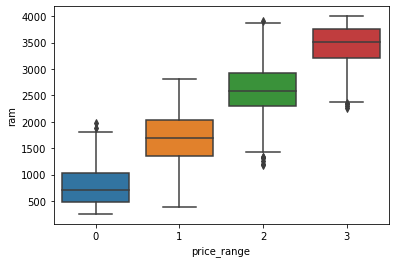

In [6]:
# box plot ram vs price
sns.boxplot(y='ram', x='price_range',data=df);

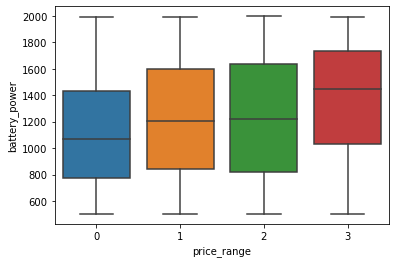

In [7]:
# box plot battery_power vs price
sns.boxplot(y='battery_power', x='price_range',data=df);

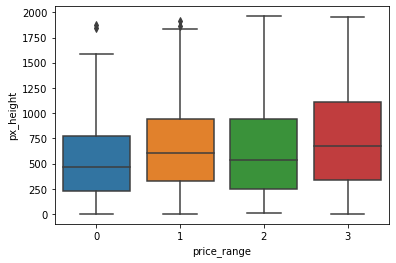

In [8]:
# box plot px_height vs price
sns.boxplot(y='px_height', x='price_range',data=df);

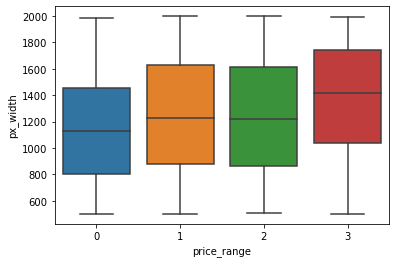

In [9]:
# box plot px_width vs price
sns.boxplot(y='px_width', x='price_range',data=df);

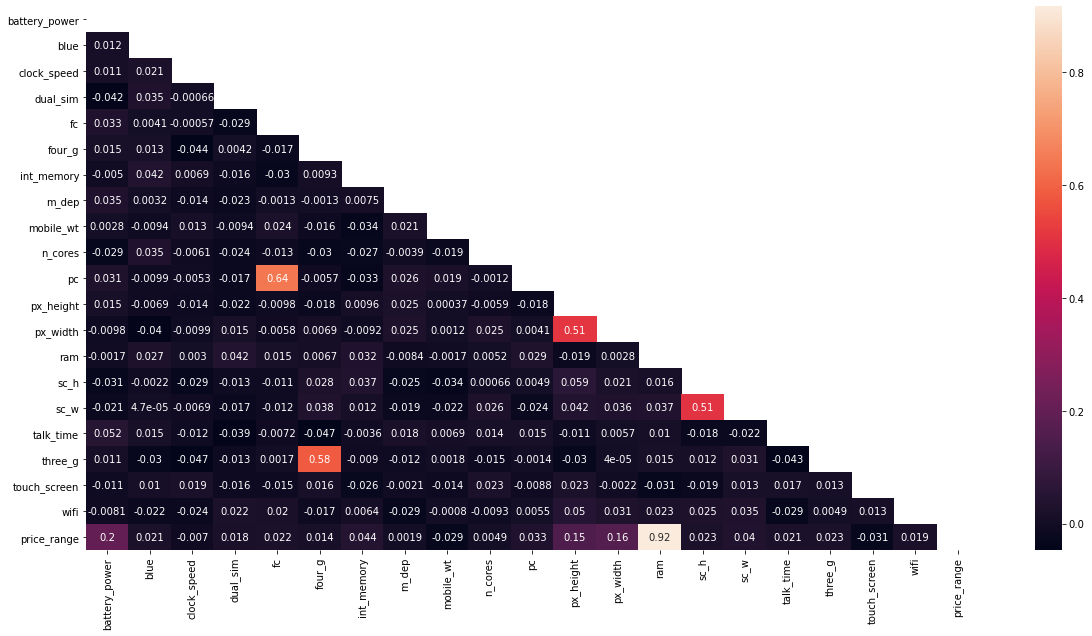

In [10]:
#heatmap of all features to check correlation with 'price_range'
mask=np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)]=True
plt.figure(figsize=(20,10))
sns.heatmap(data=df.corr(),annot=True,mask=mask);

In [11]:
#baseline score
df['price_range'].value_counts(normalize=True)

0    0.25025
2    0.25025
1    0.24975
3    0.24975
Name: price_range, dtype: float64

## Modeling

### Logistic Regression
#### Model 1:

In [12]:
#simple logistic regression model with ram as feature
X = df[['ram']]
y = df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y)

In [13]:
#fitting and scoring logistic reg model for train data
logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train,y_train)
cross_val_score(logreg,X_train,y_train,cv=5).mean()

0.7677101449275362

In [14]:
#cv score for test data
cross_val_score(logreg,X_test,y_test,cv=5).mean()

0.72

#### Model 2:

In [15]:
#second logreg model with 'battery_power' added to features
X = df[['ram','battery_power']]
y = df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y)

In [16]:
#fitting and scoring 2nd logistic reg model for train data
logreg2 = LogisticRegression(max_iter=500)
logreg2.fit(X_train,y_train)
cross_val_score(logreg2,X_train,y_train,cv=5).mean()

0.829119286510591

In [17]:
#cv score for test data
cross_val_score(logreg2,X_test,y_test,cv=5).mean()

0.8140000000000001

#### Model 3:

In [18]:
#third logreg model with 'px_height' added to features
X = df[['ram','battery_power','px_height']]
y = df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y)

In [19]:
#fitting and scoring 3rd logistic reg model for train data
logreg3 = LogisticRegression(max_iter=500)
logreg3.fit(X_train,y_train)
cross_val_score(logreg3,X_train,y_train,cv=5).mean()

0.9091995540691192

In [20]:
#cv score for test data
cross_val_score(logreg3,X_test,y_test,cv=5).mean()

0.914

#### Model 4:

In [21]:
#fourth logreg model with 'px_width' added to features
X = df[['ram','battery_power','px_height','px_width']]
y = df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y)

In [22]:
#fitting and scoring 4th logistic reg model for train data
logreg4 = LogisticRegression(max_iter=500)
logreg4.fit(X_train,y_train)
cross_val_score(logreg4,X_train,y_train,cv=5).mean()

0.9539308807134894

In [23]:
#cv score for test data
cross_val_score(logreg4,X_test,y_test,cv=5).mean()

/Users/parshantchumber/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.958

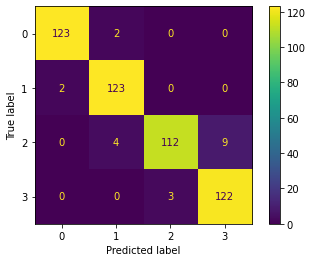

In [24]:
#creating predictions and confusion matrix for model 4
preds = logreg4.predict(X_test)
cm = confusion_matrix(y_test,preds)
ConfusionMatrixDisplay(cm).plot();

#### Model 5:

In [25]:
#scaled model 4 fit and score for train data
log_pipe = Pipeline([
    ('sc',StandardScaler()),
    ('logreg',LogisticRegression(max_iter=500))
])
log_pipe.fit(X_train,y_train)
cross_val_score(log_pipe,X_train,y_train,cv=5).mean()

0.953273132664437

In [26]:
#cv score for test data
cross_val_score(log_pipe,X_test,y_test,cv=5).mean()

0.938

### SVC

In [27]:
#fitting and scoring svc model for train data
svc = SVC(max_iter=500)
svc.fit(X_train,y_train)
cross_val_score(svc,X_train,y_train,cv=5).mean()

0.9479308807134895

In [28]:
#cv score for test data
cross_val_score(svc,X_test,y_test,cv=5).mean()

0.932

### Random Forest

In [29]:
#fitting and scoring random forest model for train data
rf = RandomForestClassifier(n_estimators=100)
cross_val_score(rf, X_train, y_train,cv = 5).mean()

0.9165596432552954

In [30]:
#cv score for test data
cross_val_score(rf, X_test, y_test,cv = 5).mean()

0.8960000000000001

### K-Nearest Neighbors

In [31]:
#fitting and scoring scaled knn pipeline for train data
knn_pipe = Pipeline([
    ('sc',StandardScaler()),
    ('knn',KNeighborsClassifier())
])
knn_pipe.fit(X_train,y_train)
cross_val_score(knn_pipe,X_train,y_train,cv=5).mean()

0.8851817168338908

In [32]:
#cv score for test data
cross_val_score(knn_pipe,X_test,y_test,cv=5).mean()

0.8320000000000001

### AdaBoost

In [33]:
#fitting and scoring AdaBoost model for train data
ad = AdaBoostClassifier()
ad.fit(X_train,y_train)
cross_val_score(ad,X_train,y_train,cv=5).mean()

0.6602742474916388

In [34]:
#cv score for test data
cross_val_score(ad,X_test,y_test,cv=5).mean()

0.734

### Creating Pickle File for Streamlit

In [35]:
pickle.dump(logreg4,open('Final_model.pkl','wb'))